<a href="https://colab.research.google.com/github/mcklrrn-corpuz/CPE-313/blob/main/Hands_on_Activity_4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 313
Code Title: | Advanced Machine Learning and Deep Learning
2nd Semester | AY 2025-2026
  |  
<u>**Hands-on Activity 4.1** | Introduction to PyTorch
**Name** | Corpuz, Micki Laurren B.
**Section** | CPE32S3
**Date Performed**: | 12 February 2026
**Date Submitted**: | 16 February 2026
**Instructor**: | Engr. Neal Barton James Matira

<hr>

### 0.Setup

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


### 1. Loading the Dataset

In [ ]:
transform = transforms.ToTensor()

In [ ]:
training_data = datasets.EMNIST(root="data", split='digits', download=True,transform=transform)

test_data = datasets.EMNIST(root="data", split='digits', download=True, transform=transform)

100%|██████████| 562M/562M [00:04<00:00, 115MB/s] 


In [ ]:
sample, _ = training_data[0]
print(sample.shape)

torch.Size([1, 28, 28])


### 2. Wrap with Data Loader

In [ ]:
batch_size = 64

train_loader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size)

### 3. Visualizing Batch

Text(0.5, 1.0, '5')

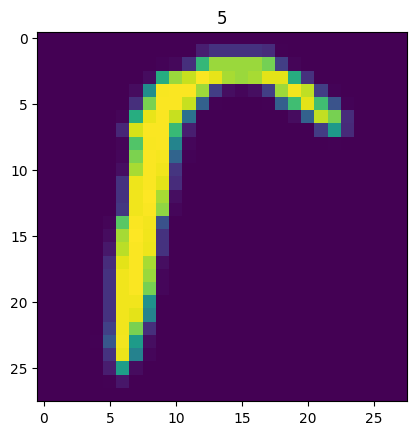

In [ ]:
images, labels = next(iter(train_loader))

plt.imshow(images[0].permute(1, 2, 0))
plt.title(labels[0].item())

### 4. Building the Neural Network

In [ ]:
class NeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()

    self.model = nn.Sequential(
        nn.Flatten(),
        nn.Linear(28*28*1, 512),
        nn.ReLU(),
        nn.Linear(512, 256),
        nn.ReLU(),
        nn.Linear(256, 10)
    )

  def forward(self, x):
    return self.model(x)

In [ ]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (model): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=512, bias=True)
    (2): ReLU()
    (3): Linear(in_features=512, out_features=256, bias=True)
    (4): ReLU()
    (5): Linear(in_features=256, out_features=10, bias=True)
  )
)


### 4. Loss + Optimizer

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

### 5. Training and Testing

In [ ]:
def train_loop(dataloader):
  model.train()

  for X, y in dataloader:
    X, y = X.to(device), y.to(device)

    pred = model(X)
    loss = loss_fn(pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


In [ ]:
def test_loop(dataloader):
  model.eval()
  correct, total_loss = 0,0

  with torch.no_grad():
    for X, y in dataloader:
      X, y = X.to(device), y.to(device)

      pred = model(X)
      total_loss += loss_fn(pred, y).item()
      correct += (pred.argmax(1) == y).sum().item()

    accuracy = correct/len(dataloader.dataset)
    print (f"Accuracy: {accuracy:.4f}")

> Run the training

In [ ]:
epochs = 50

for t in range(epochs):
  print("====================")
  print(f"Epoch {t+1}")
  train_loop(train_loader)
  test_loop(test_loader)

Epoch 1
Accuracy: 0.7031
Epoch 2
Accuracy: 0.8540
Epoch 3
Accuracy: 0.8865
Epoch 4
Accuracy: 0.9015
Epoch 5
Accuracy: 0.9106
Epoch 6
Accuracy: 0.9161
Epoch 7
Accuracy: 0.9204
Epoch 8
Accuracy: 0.9246
Epoch 9
Accuracy: 0.9279
Epoch 10
Accuracy: 0.9304
Epoch 11
Accuracy: 0.9330
Epoch 12
Accuracy: 0.9359
Epoch 13
Accuracy: 0.9376
Epoch 14
Accuracy: 0.9396
Epoch 15
Accuracy: 0.9415
Epoch 16
Accuracy: 0.9431
Epoch 17
Accuracy: 0.9448
Epoch 18
Accuracy: 0.9460
Epoch 19
Accuracy: 0.9475
Epoch 20
Accuracy: 0.9488
Epoch 21
Accuracy: 0.9499
Epoch 22
Accuracy: 0.9512
Epoch 23
Accuracy: 0.9523
Epoch 24
Accuracy: 0.9532
Epoch 25
Accuracy: 0.9540
Epoch 26
Accuracy: 0.9550
Epoch 27
Accuracy: 0.9558
Epoch 28
Accuracy: 0.9566
Epoch 29
Accuracy: 0.9576
Epoch 30
Accuracy: 0.9583
Epoch 31
Accuracy: 0.9591
Epoch 32
Accuracy: 0.9600
Epoch 33
Accuracy: 0.9607
Epoch 34
Accuracy: 0.9613
Epoch 35
Accuracy: 0.9620
Epoch 36
Accuracy: 0.9626
Epoch 37
Accuracy: 0.9634
Epoch 38
Accuracy: 0.9640
Epoch 39
Accuracy: 0.

### 6. Save and Load the Model

> Save

In [ ]:
torch.save(model.state_dict(), "model.pth")

> Load

In [ ]:
model = NeuralNetwork()
model.load_state_dict(torch.load("model.pth"))
model.eval()

NeuralNetwork(
  (model): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=512, bias=True)
    (2): ReLU()
    (3): Linear(in_features=512, out_features=256, bias=True)
    (4): ReLU()
    (5): Linear(in_features=256, out_features=10, bias=True)
  )
)

## **Conclusion**

> In this activity, I was able to explore the PyTorch workflow and understand how each part connects from preparing the dataset up to training the model. I learned how to build a model using layers, apply a loss function and optimizer, and use backpropagation through autograd. Indeed, the activity helped me see the complete process of training, evaluating, and saving a model in a new Deep Learning framework.